In [ ]:
import numpy as np
import ehtim as eh
from ehtim.movie import Movie
import matplotlib.pyplot as plt
import sys
sys.path.append("../../.")

Welcome to eht-imaging! v 1.2.10 



Generate Orbiting Hot Spot Data

In [2]:
# Specify the parameters of the movie of the orbiting hot spot
frame_height, frame_width = 400, 400
num_frames = 110
blob_sigma = 20  # Width of the Gaussian blob
blob_amplitude = 1  # Peak value of the blob
orbit_radius = 50  # Radius of the orbit

# Create grid of x and y coordinates
x = np.linspace(0, frame_width - 1, frame_width)
y = np.linspace(0, frame_height - 1, frame_height)
x_grid, y_grid = np.meshgrid(x, y)

In [3]:
def gaussian_hot_spot(x, y, x0, y0, sigma, amplitude):
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def generate_orbiting_hot_spot_frames(cycles):
    frames = []
    center_x, center_y = frame_width // 2, frame_height // 2

    for frame_num in range(num_frames):
        theta = -cycles * 2 * np.pi * frame_num / num_frames
        x_center = center_x + orbit_radius * np.cos(theta)
        y_center = center_y + orbit_radius * np.sin(theta)
        frame = gaussian_hot_spot(x_grid, y_grid, x_center, y_center, blob_sigma, blob_amplitude)
        frames.append(frame)
    return np.array(frames)

In [4]:
cycles = 5  # Number of complete orbits in the animation
frames = generate_orbiting_hot_spot_frames(cycles)
# frames = (frames - frames.min()) / (frames.max() - frames.min())  # Normalize the frames

Visualize Orbiting Hot Spot

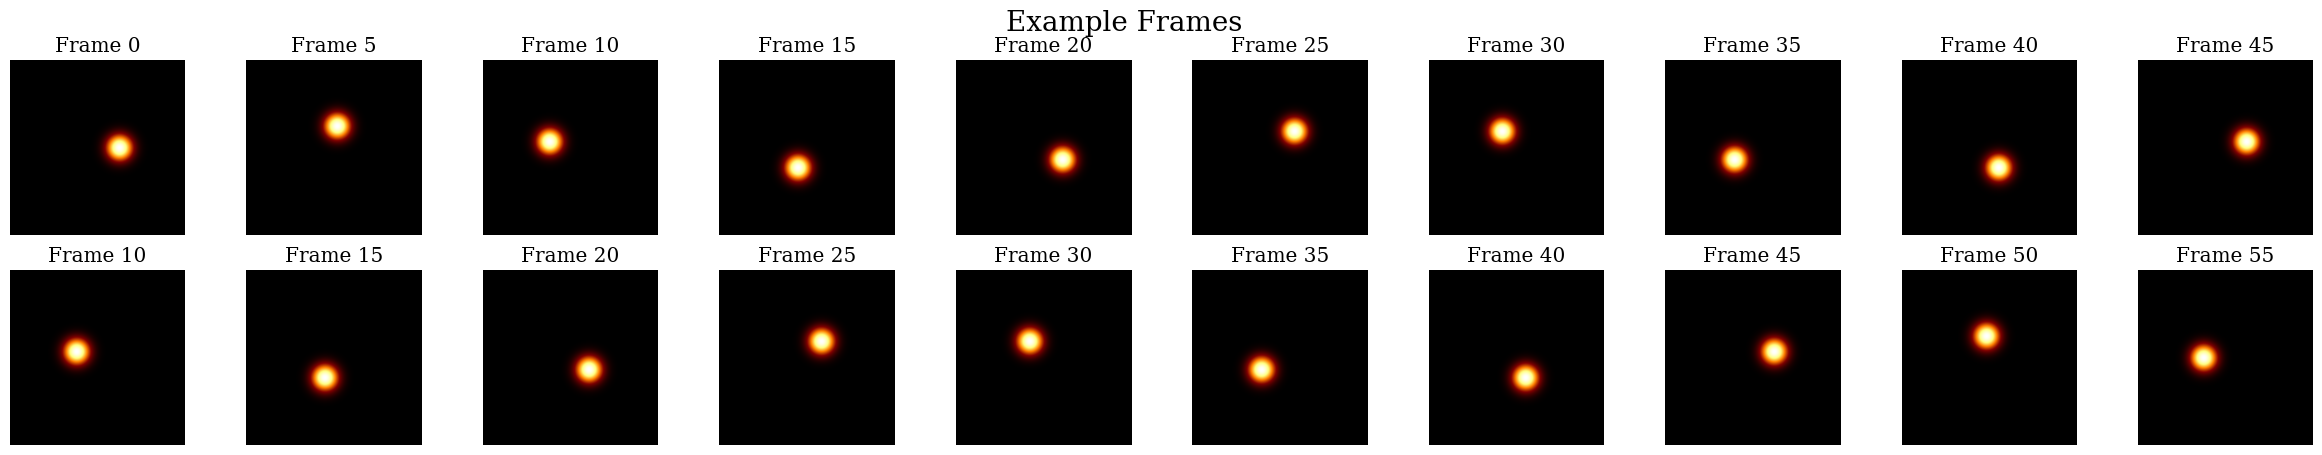

In [5]:
rows, columns = 2, 10
fig, ax = plt.subplots(rows, columns, figsize=(30,5))
delta_frame = num_frames // (rows * columns)
for i in range(rows):
    for j in range(columns):
        idx = i * columns + j * delta_frame
        ax[i, j].imshow(frames[idx], cmap="afmhot", vmin=0, vmax=1)
        ax[i, j].set_title(f"Frame {idx}")
        ax[i, j].axis("off")
fig.suptitle("Example Frames", fontsize=20, y=0.98)
plt.show()

Save Hot Spot As eht-imging Movie

In [ ]:
import os

# Define the parameters of the observation
ra, dec, mjd, psize, rf, source, polrep = 17.761121055814954, -29.0078430557251, 57854, 2.4240684055470684e-12, 227070703125.0, 'SgrA', 'stokes'
times = [10.85, 10.8793578, 10.9087156, 10.93807339, 10.96743119, 10.99678899,
          11.02614679, 11.05550459, 11.08486239, 11.11422018, 11.14357798, 11.17293578,
          11.20229358, 11.23165138, 11.26100917, 11.29036697, 11.31972477, 11.34908257,
          11.37844037, 11.40779817, 11.43715596, 11.46651376, 11.49587156, 11.52522936,
          11.55458716, 11.58394495, 11.61330275, 11.64266055, 11.67201835, 11.70137615,
          11.73073394, 11.76009174, 11.78944954, 11.81880734, 11.84816514, 11.87752294,
          11.90688073, 11.93623853, 11.96559633, 11.99495413, 12.02431193, 12.05366972,
          12.08302752, 12.11238532, 12.14174312, 12.17110092, 12.20045872, 12.22981651,
          12.25917431, 12.28853211, 12.31788991, 12.34724771, 12.3766055, 12.4059633,
          12.4353211, 12.4646789, 12.4940367, 12.5233945, 12.55275229, 12.58211009,
          12.61146789, 12.64082569, 12.67018349, 12.69954128, 12.72889908, 12.75825688,
          12.78761468, 12.81697248, 12.84633028, 12.87568807, 12.90504587, 12.93440367,
          12.96376147, 12.99311927, 13.02247706, 13.05183486, 13.08119266, 13.11055046,
          13.13990826, 13.16926606, 13.19862385, 13.22798165, 13.25733945, 13.28669725,
          13.31605505, 13.34541284, 13.37477064, 13.40412844, 13.43348624, 13.46284404,
          13.49220183, 13.52155963, 13.55091743, 13.58027523, 13.60963303, 13.63899083,
          13.66834862, 13.69770642, 13.72706422, 13.75642202, 13.78577982, 13.81513761,
          13.84449541, 13.87385321, 13.90321101, 13.93256881, 13.96192661, 13.9912844,
          14.0206422, 14.05]

# Create the ehtim Movie object
hotspot_movie = Movie(
    frames=frames,
    times=times,
    psize=psize,
    ra=ra,
    dec=dec,
    rf=rf,
    polrep=polrep,
    source=source,
    mjd=mjd
)

# Save the movie to an HDF5 file
movies_dir = "../../../movies"
os.makedirs(movies_dir, exist_ok=True)
output_path = os.path.join(movies_dir, "orbiting_hs.hdf5")
hotspot_movie.save_hdf5(output_path)

Make Simulation Observational Data From Movie

Splitting Observation File into 110 times


1it [00:00,  8.79it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


3it [00:00,  8.37it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


5it [00:00,  8.58it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


7it [00:00,  8.99it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


10it [00:01, 11.55it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


15it [00:01, 16.26it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


22it [00:01, 23.77it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

28it [00:01, 26.25it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

34it [00:01, 25.23it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

40it [00:02, 25.04it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


43it [00:02, 25.31it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


49it [00:02, 23.49it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


55it [00:02, 23.78it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


58it [00:03, 21.95it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


61it [00:03, 21.21it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


67it [00:03, 20.61it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


73it [00:03, 22.32it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


79it [00:03, 25.13it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean vi

86it [00:04, 26.81it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

90it [00:04, 28.02it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

100it [00:06,  6.89it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

104it [00:06,  9.53it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration

110it [00:06, 16.42it/s]


Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
number of pixels:  94.34266808090955
max:  125.67027514454966
min:  3.3587204977078486
max vis:  2513.405246003997
min vis:  67.16479755329495
Max number of visibilities: 182


0it [00:00, ?it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 5.593332502191173
num_vis:  91 3.7983753468403946e-05


1it [00:00,  3.88it/s]

num_vis:  91 3.798334836303578e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 5.608982394168542
num_vis:  91 3.244920697613211e-05
num_vis:  91 3.245072457150659e-05


3it [00:00,  5.77it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 6.733270275729869
num_vis:  91 6.127276460750011e-05
num_vis:  91 6.127344065586094e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


5it [00:00,  7.01it/s]

num_vis:  91 6.9210192302437665
num_vis:  91 3.769670954509548e-05
num_vis:  91 3.7697038222011556e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 6.8029167044907
num_vis:  91 4.1393626579567556e-05
num_vis:  91 4.1394937748649556e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


6it [00:00,  7.66it/s]

num_vis:  91 6.324469419977225
num_vis:  91 3.410568916005772e-05
num_vis:  91 3.410551300226446e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 6.276415274043966
num_vis:  91 2.5948180895330233e-05
num_vis:  91 2.5947803160168046e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


9it [00:01,  9.08it/s]

num_vis:  91 7.106468962805767
num_vis:  91 3.457761898244668e-05
num_vis:  91 3.4574319140046534e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 5.931279611423382
num_vis:  91 3.640272616935168e-05
num_vis:  91 3.640249008986313e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  91 6.184857407026781
num_vis:  91 5.023751968806171e-05
num_vis:  91 5.0237779485044816e-05
Producing clean visibilities from image with direct FT . . . 


11it [00:01,  9.85it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  182 13.09201478977248
num_vis:  182 4.592229580062457e-05
num_vis:  182 4.5922957997446046e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.493336151672382
num_vis:  78 4.502781904609547e-05
num_vis:  78 4.502750883042729e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


15it [00:01, 11.79it/s]

num_vis:  78 5.636064720850362
num_vis:  78 3.0576014247554396e-05
num_vis:  78 3.057599006354003e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.542241289050374
num_vis:  78 3.066561769209832e-05
num_vis:  78 3.066579551985961e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.686318206517875
num_vis:  78 5.622312545008667e-05
num_vis:  78 5.622300015732598e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


17it [00:01, 12.37it/s]

num_vis:  78 6.14979119878436
num_vis:  78 5.1866577944408024e-05
num_vis:  78 5.186833745737826e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.676368753334831
num_vis:  78 5.957619139550275e-05
num_vis:  78 5.957608415440517e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.7861695293996425
num_vis:  78 2.7557325079886933e-05
num_vis:  78 2.7558760888549134e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.026076963018049
num_vis:  78 4.1133819906752376e-05


21it [00:02, 14.47it/s]

num_vis:  78 4.1134467656062377e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.372395495651917
num_vis:  78 4.021045009254786e-05
num_vis:  78 4.021136762308114e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.347148203987015
num_vis:  78 4.068574928432007e-05
num_vis:  78 4.068556250135312e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.768763933241452
num_vis:  78 5.087970222769143e-05
num_vis:  78 5.088016642385077e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
A

25it [00:02, 14.20it/s]

num_vis:  78 5.373880749597175
num_vis:  78 2.8503534195964513e-05
num_vis:  78 2.8504020398660605e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.190521954965641
num_vis:  78 7.508619673196253e-05
num_vis:  78 7.508706622454876e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.72226630532496
num_vis:  78 4.310278274968592e-05
num_vis:  78 4.3103164627869195e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


27it [00:02, 14.27it/s]

num_vis:  78 5.622485388697468
num_vis:  78 4.820537378131059e-05
num_vis:  78 4.8205737821521006e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.545409707236643
num_vis:  78 4.4763533437112426e-05
num_vis:  78 4.476169941025795e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.899687215691682
num_vis:  78 8.603135882564238e-05
num_vis:  78 8.602940178751676e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


31it [00:02, 13.95it/s]

num_vis:  156 11.078546036380978
num_vis:  156 3.254082566801926e-05
num_vis:  156 3.253955024665473e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.92198890655993
num_vis:  78 3.184243051098447e-05
num_vis:  78 3.184343554708582e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.208856840611391
num_vis:  78 2.6203595001648794e-05
num_vis:  78 2.6204379840024412e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


33it [00:02, 14.77it/s]

num_vis:  78 5.562766976263791
num_vis:  78 3.5314104322158836e-05
num_vis:  78 3.5313433563095574e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 6.016359013619463
num_vis:  78 4.438555660544862e-05
num_vis:  78 4.438504274639481e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.011858064902826
num_vis:  78 4.433021235393594e-05
num_vis:  78 4.432941653608221e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.032895344340933
num_vis:  78 1.558116908828364e-05


37it [00:03, 14.95it/s]

num_vis:  78 1.5581551719614312e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.50272538521281
num_vis:  78 3.7010573189730055e-05
num_vis:  78 3.701066071474193e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.515490791748372
num_vis:  78 4.140635326680236e-05
num_vis:  78 4.140701689607615e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 4.927463750346805
num_vis:  78 3.561215288876043e-05
num_vis:  78 3.561041519369795e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
A

41it [00:03, 15.62it/s]

num_vis:  78 5.329813389058147
num_vis:  78 3.540721489556874e-05
num_vis:  78 3.540730236573436e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.627001804150575
num_vis:  78 5.981395175490435e-05
num_vis:  78 5.981408488049099e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.273729471090934
num_vis:  78 3.342514585725503e-05
num_vis:  78 3.34247116943019e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.881524244024172
num_vis:  78 5.30876646982572e-05


45it [00:03, 16.61it/s]

num_vis:  78 5.3087863582476466e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.394874075706335
num_vis:  78 2.247688236679857e-05
num_vis:  78 2.2476944710208478e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.29572339704923
num_vis:  78 3.1713416165967694e-05
num_vis:  78 3.1713406898447546e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.714051298781521
num_vis:  78 6.392299351657996e-05
num_vis:  78 6.392366533070522e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 

47it [00:03, 15.56it/s]

num_vis:  156 11.6625809116148
num_vis:  156 3.405560642271262e-05
num_vis:  156 3.405606997592146e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.610487507713375
num_vis:  78 3.508658040523644e-05
num_vis:  78 3.508776340517537e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 6.242951358096759
num_vis:  78 6.132788364517349e-05
num_vis:  78 6.132937916289987e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.257365024314347
num_vis:  78 3.993277199769778e-05


51it [00:04, 15.46it/s]

num_vis:  78 3.993087282063633e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.8020696081607985
num_vis:  78 3.0689253271215866e-05
num_vis:  78 3.0689042487242535e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.4019420511905905
num_vis:  78 2.4810819812188253e-05
num_vis:  78 2.4810249156748308e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.323715710718324
num_vis:  78 1.92908486808708e-05
num_vis:  78 1.9291604382672817e-05
Producing clean visibilities from image with direct FT . . . 


55it [00:04, 16.56it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.754240936186563
num_vis:  78 3.207511367795857e-05
num_vis:  78 3.207433145598886e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.789022737288928
num_vis:  78 2.754299307350569e-05
num_vis:  78 2.754368201645449e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.839320289427681
num_vis:  78 3.120813347184171e-05
num_vis:  78 3.120823374074816e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.427041028521302
num_vis:  78 3.361701264518082e-

59it [00:04, 16.20it/s]

num_vis:  78 3.361790036435136e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.5348918472098845
num_vis:  78 5.5531477813448476e-05
num_vis:  78 5.5529131230058744e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.537260024735845
num_vis:  78 2.820983074899701e-05
num_vis:  78 2.821113543757089e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 4.943813676819818
num_vis:  78 4.56511044796783e-05
num_vis:  78 4.5651321928121815e-05
Producing clean visibilities from image with direct FT . . . 


61it [00:04, 15.71it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.522460449236681
num_vis:  78 2.578276321913116e-05
num_vis:  78 2.5783496367073604e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.5627511008200425
num_vis:  78 3.5354507489515025e-05
num_vis:  78 3.5353728972021864e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.980623260640047
num_vis:  78 6.694396073292158e-05
num_vis:  78 6.69430321894049e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


65it [00:04, 15.23it/s]

num_vis:  78 5.147162732318813
num_vis:  78 3.318497615559225e-05
num_vis:  78 3.318602614238158e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  156 10.227834477073223
num_vis:  156 2.812487702278958e-05
num_vis:  156 2.8124520755810744e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.914690652166412
num_vis:  78 3.9746265667205346e-05
num_vis:  78 3.974632214435597e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


69it [00:05, 15.95it/s]

num_vis:  78 5.290139459907749
num_vis:  78 2.2053011039900853e-05
num_vis:  78 2.2054109196803437e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.642528688483292
num_vis:  78 3.5533380265121454e-05
num_vis:  78 3.553344244695501e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.899320212249007
num_vis:  78 2.9367896844776617e-05
num_vis:  78 2.9368229457279583e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.560278620462153
num_vis:  78 2.895205394608409e-05
num_vis:  78 2.8952348108412925e-05
Producing clean visibilities from image with direct FT . . . 


71it [00:05, 15.90it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.248852240432348
num_vis:  78 3.531537834814467e-05
num_vis:  78 3.531577190957428e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.451035590876788
num_vis:  78 4.003571405304911e-05
num_vis:  78 4.003729784566566e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.375900263183183
num_vis:  78 2.9238648792800307e-05
num_vis:  78 2.9237716266684173e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


75it [00:05, 16.40it/s]

num_vis:  78 5.351047766144319
num_vis:  78 2.4449233603661154e-05
num_vis:  78 2.444899415892346e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.6040615814895
num_vis:  78 3.491779983806037e-05
num_vis:  78 3.4917766714180065e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.370605831798479
num_vis:  78 3.51364898788517e-05
num_vis:  78 3.513602921119885e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.085114529246322
num_vis:  78 2.5676299681586204e-05
num_vis:  78 2.567628240146222e-05
Producing clean visibilities from image with direct FT . . . 


79it [00:05, 16.19it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 4.990531946230985
num_vis:  78 1.626437371866526e-05
num_vis:  78 1.626487125003527e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.640518783614937
num_vis:  78 4.3570437339946136e-05
num_vis:  78 4.3570340920117465e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.445637464981591
num_vis:  78 5.710534978046711e-05
num_vis:  78 5.710610133214249e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


81it [00:05, 15.99it/s]

num_vis:  78 5.776950263896246
num_vis:  78 5.936905153081575e-05
num_vis:  78 5.936905440029266e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.734638019378938
num_vis:  78 5.099028464013707e-05
num_vis:  78 5.099272107271029e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  156 11.075562367888693
num_vis:  156 3.8283192539132776e-05
num_vis:  156 3.828341701947087e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


85it [00:06, 15.58it/s]

num_vis:  78 6.205034461049134
num_vis:  78 7.199765975737637e-05
num_vis:  78 7.19955120977143e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 6.4379040073233025
num_vis:  78 7.738971982288237e-05
num_vis:  78 7.738943882301719e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.4879420865605955
num_vis:  78 4.756053595295752e-05
num_vis:  78 4.755976985871984e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.737496577382856
num_vis:  78 4.820484263632048e-05
num_vis:  78 4.820442045949121e-05
Producing clean visibilities from image with direct FT . . . 


89it [00:06, 16.27it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.713576063862442
num_vis:  78 4.940207360783299e-05
num_vis:  78 4.940185344662927e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.839576609472411
num_vis:  78 2.742515795892184e-05
num_vis:  78 2.7424779774370905e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.526313801891476
num_vis:  78 3.7232167316415414e-05
num_vis:  78 3.723072417146681e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


91it [00:06, 15.54it/s]

num_vis:  78 6.282442242956405
num_vis:  78 5.2451672490496994e-05
num_vis:  78 5.24524843329799e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.810216317172143
num_vis:  78 4.050673021413057e-05
num_vis:  78 4.050624784949451e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.628798872935807
num_vis:  78 3.588997174564569e-05
num_vis:  78 3.58909829831071e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


95it [00:06, 15.24it/s]

num_vis:  78 6.104427078859221
num_vis:  78 2.7673530264848372e-05
num_vis:  78 2.767495780422794e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.048933147308416
num_vis:  78 3.4411655098996865e-05
num_vis:  78 3.4411432476905694e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  78 5.783521047345097
num_vis:  78 2.8787051861427588e-05
num_vis:  78 2.878677165339404e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


99it [00:07, 16.10it/s]

num_vis:  78 5.781787889889606
num_vis:  78 2.761627920043913e-05
num_vis:  78 2.761697067123649e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 5.009756802582361
num_vis:  66 3.485154812816048e-05
num_vis:  66 3.485088173376394e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 4.652975094685554
num_vis:  66 3.229698761628695e-05
num_vis:  66 3.229680224106517e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  132 9.331916859515342
num_vis:  132 3.59799292300187e-05
num_vis:  132 3.597969646941112e-05
Producing clean visibilities from image with direct FT . . . 
Adding gai

103it [00:07, 16.78it/s]

num_vis:  66 4.550515114533374
num_vis:  66 2.7622421400589324e-05
num_vis:  66 2.7623248943871894e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 5.1588172596280515
num_vis:  66 4.971918695705772e-05
num_vis:  66 4.9720070375092294e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 4.738512324968845
num_vis:  66 2.6483695421416653e-05
num_vis:  66 2.6483266140050926e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 5.063987680618453
num_vis:  66 3.562829693569268e-05
num_vis:  66 3.562744501368921e-05
Producing clean visibilities from image with direct FT . . . 


105it [00:07, 15.51it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 5.151879095208438
num_vis:  66 3.772148542752441e-05
num_vis:  66 3.77220956391571e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 3.9500054522682166
num_vis:  66 2.692900486515691e-05
num_vis:  66 2.692888275322235e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 5.122083812551821
num_vis:  66 5.457916492373424e-05
num_vis:  66 5.4580280683857846e-05
Producing clean visibilities from image with direct FT . . . 


107it [00:07, 15.11it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 4.775174701273384
num_vis:  66 1.663764076999599e-05
num_vis:  66 1.6637679545931285e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 4.972277004386777
num_vis:  66 2.6064508075359328e-05
num_vis:  66 2.6064723267302627e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 4.602307452470481
num_vis:  66 3.74233159525658e-05
num_vis:  66 3.742367123932109e-05


110it [00:07, 14.07it/s]


Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  66 4.863128257193914
num_vis:  66 3.652248891030992e-05
num_vis:  66 3.6522694573009914e-05
3.9051929483530375e-05
Building NX table


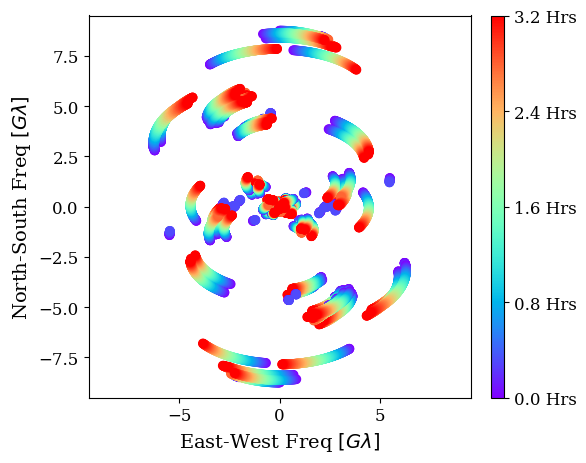

In [ ]:
from make_data import resize_images, save_movie_to_hdf5, create_obs, plot_uv_coverage, diagnostics, generate_data
# NOTE: uncomment if ngEHT array is used
# array_path = 'ngEHT.txt'
# array = eh.array.load_txt(array_path)

hs_data_dir = "../../../hs_data"
os.makedirs(hs_data_dir, exist_ok=True)

# NOTE: Uncomment the following lines to use ngEHT_plus array
# array = ['ALMA', 'APEX', 'GLT', 'JCMT', 'KP', 'LMT', 'SMA', 'SMT', 'SPT', 'BAJA', 'BAR', 'CAT', 
#         'CNI', 'GAM', 'GARS', 'HAY', 'NZ', 'OVRO', 'SGO', 'CAS', 'LLA', 'PIKE', 'PV']
# array_name = 'ngEHT_plus'  NOTE: uncomment if ngEHT array is used
array_name = "ngEHT"
array = "ngEHT"
movie_name = "orbiting_hs"
noisy = False  # Set to True to add phase and amplitude errors to the data, though this hasn't been tested yet with this additional noise
fractional_noise = 0.05 # Fractional noise level to add to the data
is_array = type(array) is not list # True if array is a list of strings, False if it is a string
if noisy:
    obs_path = os.path.join(hs_data_dir, f"{array_name}/{movie_name}_f{fractional_noise}_noisy")
else:
    obs_path = os.path.join(hs_data_dir, f"{array_name}/{movie_name}_f{fractional_noise}")
os.makedirs(obs_path, exist_ok=True)

movie = eh.movie.load_hdf5(f"../../../movies/{movie_name}.hdf5")
ims = movie.im_list()
npix = int(np.sqrt(len(ims[0]._imdict['I']))) # =400
npix_old = npix

scale_factor = 5
npix = npix // scale_factor
psize = ims[0].psize
new_psize = ims[0].psize * scale_factor  # Adjust pixel size accordingly


ims = resize_images(ims, npix, npix_old, new_psize)
save_movie_to_hdf5(ims, movie, os.path.join(obs_path, "gt_video.hdf5"))
obs, obs_frames, prior, fov = create_obs(ims[0], movie, npix, array, is_array=is_array)
plot_uv_coverage(obs, f"{array_name}_coverage.png") # plots the uv coverage of the array
max_vis = diagnostics(ims, obs_frames, fractional_noise, prior, fov, npix_old, noisy)

generate_data(obs_path, obs_frames, fractional_noise, ims, prior, npix, max_vis, noisy)